In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ***Page Rank***
--------------

In [2]:
# Developed by Google founders to determine the importance of web pages in the Web.
# Page rank is score based. 
# It assigns a score for each node in the network based on the number of in-links a web page has.
# Page rank ranks nodes with higher number of in-links higher than those with lower numbers of in-links.

# in-links -> links in other web pages that link to this web page.

# thus, works better for directed networks so we can know the direction of movement.

## ***The process of ranking pages ->***
***`A network with N number of nodes and K number of page ranking steps.`***

1. Assign all nodes a page rank 1/N
2. Have every node give its page rank to all nodes it points to.
3. Repeat this over and over again k times.

In [3]:
# In the first iteration, the updated page ranks of nodes will be the sum of the page ranks of nodes that point to it.

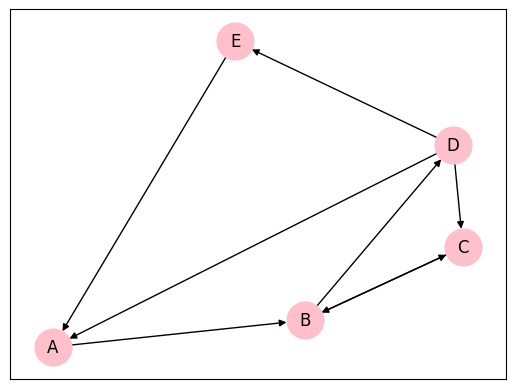

In [17]:
graph = nx.MultiDiGraph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "B"), ("D", "C"), ("D", "A"), ("D", "E"), ("E", "A")])
positions = nx.spiral_layout(graph)
nx.draw_networkx(graph, node_color = "pink", node_size = 700, pos = positions)

In [18]:
# Initial page rank

1 / len(graph.nodes())

0.2

In [19]:
# Note that the new page rank replaces the old page rank after every iteration.
# It is not added to the old page rank.
# If a node points to more than one node, its page rank has to be equally divided among the node it points to, in every iteration.
# It cannot give it's whole page rank to all the node it points to.

In [20]:
# Consider A
# Nodes D and E point to A
# D points to A, C & E
# So, A will give (0.2/3) to node A
# E points to A only, so A will receive 0.2 from E
# At the end of first iteration A will have a page rank

(0.2 / 3) + 0.2

0.26666666666666666

In [21]:
# In an iteration, the old value will be that from the previous iteration.
# Newly updated page ranks in the current iteration will only be used in the next iteration!.

In [24]:
# At the end of first iteration or page rank update

print("Page rank of node {} is {}.".format("A", (0.2 / 3) + 0.2))
print("Page rank of node {} is {}.".format("B", 0.2 + 0.2))
print("Page rank of node {} is {}.".format("C", (0.2 / 3) + (0.2 / 2)))
print("Page rank of node {} is {}.".format("D", 0.2 / 2))
print("Page rank of node {} is {}.".format("E", 0.2 / 3))

Page rank of node A is 0.26666666666666666.
Page rank of node B is 0.4.
Page rank of node C is 0.16666666666666669.
Page rank of node D is 0.1.
Page rank of node E is 0.06666666666666667.


In [25]:
# In the second iteration, the same process will be repeated with using the updated page ranks as old values.

In [30]:
# After the second iteration,

print("Page rank of node {} is {}.".format("A", (0.2 / 3) + ((0.2 / 2) / 3)))
print("Page rank of node {} is {}.".format("B", (0.2 / 3) + 0.2 + (0.2 / 3) + (0.2 / 2)))
print("Page rank of node {} is {}.".format("C", ((0.2 / 2) / 3) + ((0.2 + 0.2) / 2)))
print("Page rank of node {} is {}.".format("D", ( 0.2 + 0.2) / 2))
print("Page rank of node {} is {}.".format("E", (0.2 / 2) / 3))

Page rank of node A is 0.1.
Page rank of node B is 0.43333333333333335.
Page rank of node C is 0.23333333333333334.
Page rank of node D is 0.2.
Page rank of node E is 0.03333333333333333.


In [31]:
# Okay, so how many times do we have to iterate to get a satisfactory value?
# When do we stop?

# As you keep iterating over and over agin, at one point the page ranks will become resonably constant
# (very small changes between successive iterations)
# So, keep iterating until you get a fairly stable set of values.